<a href="https://colab.research.google.com/github/SharonCao0920/AI/blob/main/CS483_AI_Lecture_HW_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Theta 0 = 0.11
Theta 1 = 1.42
The graph is: 


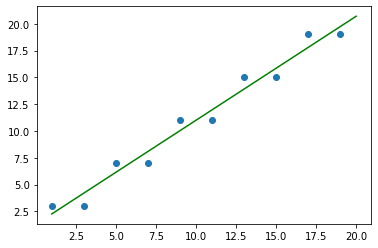

In [13]:
"""
Question #1
Train your hypothesis functions for multiclass classification from the following 
given dataset by python program. And then predict what Y’s value is in the last 
4 samples (highlighted in red color). Verify your classifier model by plotting 
all points and decision lines 
"""
import numpy as np

#cost function
#differential partial derivitive
def pTheta(theta0,theta1, x, y):
  pTh0 = 0
  pTh1 = 0
  for i in range(0, len(x)):
    pTh0 += (theta0 + theta1 * x[i] - y[i]) * 1
    pTh1 += (theta0 + theta1 * x[i] - y[i]) * x[i]
  return (pTh0/len(x), pTh1/len(x))


#Gradient descent method
def theta (theta0, theta1, alpha, iteration, x, y):
  (der_t0, der_t1) = pTheta(theta0,theta1, x, y)
  theta_0, theta_1 = theta0, theta1
  for i in range(iteration):
    theta_0=theta0-alpha*der_t0
    theta_1=theta1-alpha*der_t1
    (der_t0, der_t1) = pTheta(theta0, theta1, x, y)
    
  print ("Theta 0 =", theta_0)
  print ("Theta 1 =", theta_1)
  return (theta_0, theta_1)


#h(theta) = theta0 + theta1*x
x = (1, 3, 5, 7, 9, 11, 13, 15, 17, 19)
y = (3, 3, 7, 7, 11, 11, 15, 15, 19, 19)

theta(0, 0, 0.01, 10000, x, y)

"""
Plot (x, y)
"""
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#create DataFrame
df = pd.DataFrame({'x': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19],
                   'y': [3, 3, 7, 7, 11, 11, 15, 15, 19, 19]})

#fit polynomial model 1
model1 = np.poly1d(np.polyfit(df.x, df.y, 1))
print("The graph is: ")
polyline = np.linspace(1, 20, 50)
plt.scatter(df.x, df.y)
plt.plot(polyline, model1(polyline), color='green')
plt.show()


Theta  0  =  0.25212746225707083
Theta  1  =  1.4078075890845227
Theta  2  =  0.6030551920504754
Theta  3  =  0.7411498220548309
Theta  4  =  0.2724068006753089
Theta  5  =  0.6320985090107721
Theta  6  =  0.25341039095149764
Theta  7  =  1.0586820949745919
Theta  8  =  0.25312594410193134



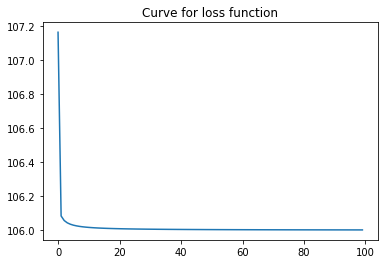

First predition result:  Class 4
Second predition result:  Class 4


In [163]:
"""
Question #2
Create hypothesis function/loss function/cost function for binary classification, 
and train your module by python program based on gradient descent algorithm from 
he following breast cancer dataset. After that, predict which class of last two 
records (highlighted in red color) is 
"""

from sklearn.datasets import make_classification
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import pandas as pd

data = pd.DataFrame()

data['x1']=[8,5,1,8,7,4,4,10,6,7,10,3,8,1,5,3,5,2,1,3,2,10,2,3,2,10,6,5,2,10,6,5]
data['x2']=[10,3,1,7,4,1,1,7,1,3,5,1,4,1,2,2,1,1,1,1,1,7,1,1,1,10,2,4,5,4,10,6]
data['x3']=[10,3,1,5,6,1,1,7,1,2,5,1,5,1,3,1,1,1,3,1,1,7,1,2,1,10,1,4,3,3,10,5]
data['x4']=[8,3,1,10,4,1,1,6,1,10,3,1,1,1,4,1,1,1,1,1,1,3,2,1,1,8,1,9,3,1,2,6]
data['x5']=[7,2,2,7,6,2,2,4,2,5,6,2,2,2,2,1,2,2,2,1,2,8,2,2,2,6,1,2,6,3,8,10]
data['x6']=[10,3,3,9,1,1,1,10,1,10,7,1,5,1,7,1,1,1,1,1,1,5,1,1,1,1,1,10,7,3,10,1]
data['x7']=[9,4,3,5,4,2,3,4,3,5,7,2,7,3,3,2,2,2,1,2,3,7,3,2,2,8,7,5,7,6,7,3]
data['x8']=[7,4,1,5,3,1,1,1,1,4,10,1,3,1,6,1,1,1,1,1,1,4,1,1,1,9,1,6,5,5,3,1]
data['x9']=[1,1,1,4,1,1,1,2,1,4,1,1,1,1,1,1,1,1,1,1,1,3,1,1,1,1,1,1,1,2,3,1]
data['y']=[4,4,2,4,4,2,2,4,2,4,4,2,4,2,4,2,2,2,2,2,2,4,2,2,2,4,2,4,4,4,4,4]
#data['y']=[1,1,0,1,1,0,0,1,0,1,1,0,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,1,1,1,1]

#print(data)
#sns.pairplot(data, hue='y')

from sklearn.model_selection import train_test_split
# 80% train
train, test= train_test_split(data.values, test_size=0.2)

from math import exp
# for general cases of n features (linear z)
def predict(row, theta):
  x = row [0:9]
  #hypothesis function
  yhat = theta[0]
  for i, xi in enumerate(x):
    yhat += theta[i+1]*xi
  return 1.0 / (1.0 + exp(-yhat))

l_rate = 0.3
n_iter = 100
nd = 9

#loss function
loss = np.zeros(n_iter)
theta = [0.0]*(nd+1)
for iter in range(n_iter):
  sum_error = 0
  for row in train:
    x = row[0:-1]
    y = row[-1] #last column in matrix
    yhat = predict(row, theta)
    error = y-yhat
    sum_error += error*2
    theta[0] += l_rate*error*yhat*(1-yhat)
    for i in range (nd):
      theta[i+1] += l_rate*error*yhat*(1-yhat)*(x[i]**2)
  loss[iter] = sum_error

print()
for i in range(nd):
  print("Theta ", i, " = ", theta[i] )
print()

plt.plot(loss)
plt.title('Curve for loss function')
plt.show()

def test(x, theta):
  yhat = theta[0]
  for i in range (len(x)-1):
     yhat += theta[i+1]*(x[i]**2)
  return yhat
x_p1=[10,10,10,4,8,1,8, 10, 1]
x_p2=[6,6,6,9,6,2,7,8,1]

print("First predition result: ","Class 4" if test(x_p1, theta)>0 else "Class 2")
print("Second predition result: ","Class 4" if test(x_p2, theta)>0 else "Class 2")

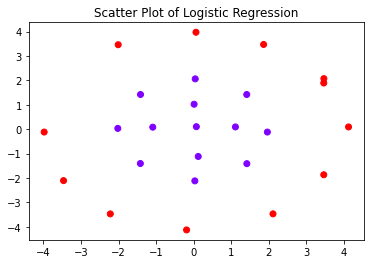


Theta 0 =  -4.478039687301264
Theta 1 =  0.49926685580735125
Theta 2 =  0.47627181181190686



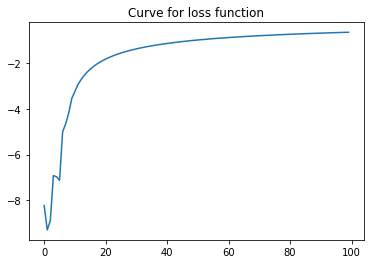

In [138]:
"""
Question #3
Given the following dataset, design python function as binary classifier for the 
following two classes. 
	- Plot all points in two different classes first in Excel or python matplotlib functions
	- Observe what boundary decision function is good to separate two classes
  - Build up hypothesis function/loss function/cost function based on your 
  selected   decision function
  - Write python program to train your model
  - After model training, plot decision boundary function in Excel or python 
  matplotlib functions
"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import seaborn as sns

data = pd.DataFrame()

data['x1']=[-3.98, -3.464,3.461,-2.22,-2.02,-2.01,-1.42,-1.416,-1.09,-0.19,0.01,0.03,
    0.04,0.06,0.07,0.12,1.11,1.411,1.414,1.86,1.96,2.11,3.461,3.464,4.12]
data['x2']=[-0.12,-2.11,1.89,-3.474,0.03,3.459,-1.409,1.419,0.08,-4.13,1.02,-2.12,
    2.06,3.97,0.1,-1.12,0.09,1.419,-1.415,3.47,-0.12,-3.472,-1.87,2.07,0.09]
data['y']=[1,1,1,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,1,1,1]

# Create a scatter plot
plt.scatter(data.x1, data.x2, c=data.y, cmap='rainbow')
plt.title('Scatter Plot of Logistic Regression')
plt.show()
#sns.pairplot(data, hue='y')

from sklearn.model_selection import train_test_split
# 80% train
train, test= train_test_split(data.values, test_size=0.2)

from math import exp

def predict(row, theta):
  x = row [0:2]
  #hypothesis function
  yhat = theta[0] + theta[1]*(x[0]**2) + theta[2]*(x[1]**2)
  return 1.0 / (1.0 + exp(-yhat))

l_rate = 0.3
n_iter = 100

#loss function
loss = np.zeros(n_iter)
theta = [0.0, 0.0, 0.0]
for iter in range(n_iter):
  sum_error = 0
  for row in train:
    x = row[0:-1]
    y = row[-1] #last column in matrix
    yhat = predict(row, theta)
    error = y-yhat
    sum_error += error*2
    theta[0] += l_rate*error*yhat*(1-yhat)
    theta[1] += l_rate*error*yhat*(1-yhat)*(x[0]**2)
    theta[2] += l_rate*error*yhat*(1-yhat)*(x[1]**2)
  loss[iter] = sum_error

print()
print("Theta 0 = ", theta[0])
print("Theta 1 = ", theta[1])
print("Theta 2 = ", theta[2])
print()


# #plot hypothesis function
# from pylab import meshgrid, cm, imshow, contour, clabel, colorbar, axis, title, show

# def hypothesis_func(x1, x2):
#   return 1.0 / (1.0 + exp(-(theta[0] + theta[1]*(x1**2) + theta[2]*(x2**2))))

# x1 = [-3.98, -3.464,3.461,-2.22,-2.02,-2.01,-1.42,-1.416,-1.09,-0.19,0.01,0.03,
#     0.04,0.06,0.07,0.12,1.11,1.411,1.414,1.86,1.96,2.11,3.461,3.464,4.12]
# x2 =[-0.12,-2.11,1.89,-3.474,0.03,3.459,-1.409,1.419,0.08,-4.13,1.02,-2.12,
#     2.06,3.97,0.1,-1.12,0.09,1.419,-1.415,3.47,-0.12,-3.472,-1.87,2.07,0.09]
# X1, X2 = meshgrid(x1, x2)
# Y = hypothesis_func(X1, X2)
# im = imshow(Y, cmap=cm.RdBu)

# cset = contour(Y,arange(-1,1,0.1),linewidths=2,cmap=cm.Set2)
# clabel(cset,inline=True,fmt='%1.1f',fontsize=10)
# colorbar(im) # adding the colobar on the right
# # latex fashion title
# title('Hypothesis')
# show()

plt.plot(loss)
plt.title('Curve for loss function')
plt.show()







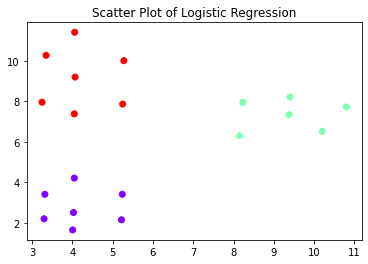

Test Group '0': 
Theta  0  is:  9.868169975906746
Theta  1  is:  -0.3259596902718352
Theta  2  is:  -1.5631891463332728
p1 is in Group '0'



Test Group '1': 
Theta  0  is:  -10.892830711963821
Theta  1  is:  1.702675147819209
Theta  2  is:  -0.12877856938844265

p2 is in Group '1'


Test Group '2': 
Theta  0  is:  -1.5068853568783098
Theta  1  is:  -3.6078554242261465
Theta  2  is:  3.0171688609605147


p3 is in Group '2'



In [165]:
"""
Question #4
Train your hypothesis functions for multiclass classification from the following 
given dataset by python program. And then predict what Y’s value is in the last 
4 samples (highlighted in red color). Verify your classifier model by plotting 
all points and decision lines  
"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import seaborn as sns

data = pd.DataFrame()

data['x1']=[3.25,3.3,3.32,3.35,4.01,4.03,4.05,4.05,4.06,4.07,5.22,5.24,5.25,5.28,8.15,8.23,9.38,9.4,10.2,10.8]
data['x2']=[7.956,2.2,3.41,10.272,1.65,2.51,4.21,7.38,11.412,9.198,2.15,3.41,7.866,10.008,6.3,7.95,7.34,8.21,6.52,7.72]
data['y']=[2,0,0,2,0,0,0,2,2,2,0,0,2,2,1,1,1,1,1,1]
data['y1']=[0,1,1,0,1,1,1,0,0,0,1,1,0,0,0,0,0,0,0,0]
data['y2']=[0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1]
data['y3']=[1,0,0,1,0,0,0,1,1,1,0,0,1,1,0,0,0,0,0,0]

#print(data)
# Create a scatter plot
plt.scatter(data.x1, data.x2, c=data.y, cmap='rainbow')
plt.title('Scatter Plot of Logistic Regression')
plt.show()
#sns.pairplot(data, hue='y')

from sklearn.model_selection import train_test_split
# 80% train
train, test= train_test_split(data.values, test_size=0.2)

from math import exp

def predict(row, theta):
  x = row [0:2]
  #hypothesis function
  yhat = theta[0] + theta[1]*x[0] + theta[2]*x[1]
  return 1.0 / (1.0 + exp(-yhat))

#loss function
def find_theta(train, l_rate, n_iter, c_num):
  loss = np.zeros(n_iter)
  theta = [0.0, 0.0, 0.0]
  for iter in range(n_iter):
    sum_error = 0
    for row in train:
      x = row[0:-1]
      y = row[c_num] #last column in matrix
      yhat = predict(row, theta)
      error = y-yhat
      sum_error += error*2
      theta[0] += l_rate*error*yhat*(1-yhat)
      theta[1] += l_rate*error*yhat*(1-yhat)*x[0]
      theta[2] += l_rate*error*yhat*(1-yhat)*x[1]
    loss[iter] = sum_error
  return theta

def print_theta(theta):
  for i in range(len(theta)): 
    print("Theta ", i, " is: ", theta[i])

#prediction for 4 results
def predict_r(p, theta):
  yhat = theta[0] + theta[1]*p[0] + theta[2]*p[1]
  return yhat
  #return 1.0 / (1.0 + exp(-yhat))

#data to predict
p1=[4.01,3.02]
p2=[9.1,6.5]
p3=[3.50,9.50]
p4=[6.01,6.01]

########### Group 0 ################
print("Test Group '0': ")
l_rate = 0.3
n_iter = 1000

theta = find_theta(train, l_rate, n_iter, -3)

print_theta(theta)
# print(predict_r(p1, theta))
# print(predict_r(p2, theta))
# print(predict_r(p3, theta))
# print(predict_r(p4, theta))
print("p1 is in Group '0'" if predict_r(p1, theta) >= 0 else "")
print("p2 is in Group '0'" if predict_r(p2, theta) >= 0 else "")
print("p3 is in Group '0'" if predict_r(p3, theta) >= 0 else "")
print("p4 is in Group '0'" if predict_r(p4, theta) >= 0 else "")

########### Group 1 ################
print("Test Group '1': ")
l_rate = 0.3
n_iter = 1000

theta = find_theta(train, l_rate, n_iter, -2)

print_theta(theta)
# print(predict_r(p1, theta))
# print(predict_r(p2, theta))
# print(predict_r(p3, theta))
# print(predict_r(p4, theta))
print("p1 is in Group '1'" if predict_r(p1, theta) >= 0 else "")
print("p2 is in Group '1'" if predict_r(p2, theta) >= 0 else "")
print("p3 is in Group '1'" if predict_r(p3, theta) >= 0 else "")
print("p4 is in Group '1'" if predict_r(p4, theta) >= 0 else "")

########### Group 2 ################
print("Test Group '2': ")
l_rate = 0.3
n_iter = 1000

theta = find_theta(train, l_rate, n_iter, -1)

print_theta(theta)
# print(predict_r(p1, theta))
# print(predict_r(p2, theta))
# print(predict_r(p3, theta))
# print(predict_r(p4, theta))
print("p1 is in Group '2'" if predict_r(p1, theta) >= 0 else "")
print("p2 is in Group '2'" if predict_r(p2, theta) >= 0 else "")
print("p3 is in Group '2'" if predict_r(p3, theta) >= 0 else "")
print("p4 is in Group '2'" if predict_r(p4, theta) >= 0 else "")
